# Machine Learning

### Projeto 01: implementando algoritmos de classificação

# 01 - Introdução

- O trabalho consiste na criação de dois algoritmos de predição, implementados manualmente sem uso de APIs como o Scikit-Learn. Deve-se usar técnicas de análise de erros para compara-los entre si, a fim de identificar diferenças nos resultados finais das duas implementações.  
- Usaremos o "The Iris flower data set" para testar nosso algoritmos e comparar os resultados.

# 02 - Naive Bayes

- É uma técnica de classificação baseado no teorema de Bayes com uma suposição de independência entre os preditores. O classificador assume que a presença de uma característica particular em uma classe não está relacionada com a presença de qualquer outro recurso. Por exemplo, uma planta 'Iris' pode ser considerado uma 'Iris Setosa' a partir da largura de seu caule, das suas pétalas, etc. Mesmo que esses recursos dependam uns dos outros ou da existência de outras características, todas estas propriedades contribuem de forma independente para a probabilidade de que esta planta é uma 'Iris Setosa' e é por isso que é conhecido como ‘Naive’ (ingênuo em portugues). Apesar de simples, Naive Bayes é conhecido por ganhar de métodos de classificação altamente sofisticados.

### Pontos positivos desse método

- É fácil e rápido para prever o conjunto de dados da classe de teste. Também tem um bom desempenho na previsão de classes múltiplas.
- Quando a suposição de independência prevalece, um classificador Naive Bayes tem melhor desempenho em comparação com outros modelos como regressão logística

### Pontos negativos desse método

- Se a variável categórica tem uma categoria (no conjunto de dados de teste) que não foi observada no conjunto de dados de treinamento, então o modelo irá atribuir uma probabilidade de 0 (zero) e não será capaz de fazer uma previsão. 
- Outra limitação do Naive Bayes é a suposição de preditores independentes. Na vida real, é quase impossível que ter um conjunto de indicadores que sejam completamente independentes.

## Passo a passo da implementação 

### Criando a classe:

In [ ]:
class NaiveBayes(object):

### Método Construtor:

- Receberá como argumento (opcional) um valor que será atribuído a variável 'percent'. Ela é usada para identificar proximidades entre objetos dentro do aprendizado (default = 0.3).

In [ ]:
    def __init__(self, percent=0.3):
        self.percent = percent

### Método Learn:

- Receberá um conjunto de dados (X:matriz 2d, Y:array 1d), e criará atributos organizando esses dados, com intuito de permitir e otimizar a criação do método predict posteriormente

In [ ]:
    def learn(self, X, Y):
        """
            unique: Targets
            counts: Número de vezes que a Target aparece
        """
        unique, counts = np.unique(Y, return_counts=True)
        

        """
            Criando dicionario de previsão inicial. 
            Key = Target
            Value = (Quantidades de vezes que o Target aparece) / (total de elementos no array Y)
        """
        self.prob_inicial = dict(zip(unique, counts/len(Y)))
        

        """
            Criando dicionario para auxiliar nas contas
            Key = Targets
            Value = (Quantidade de vezes que a Target aparece)
        """
        self.prob_aux = dict(zip(unique,counts))
        

        """
            Criando dicionário para armazenar os valores de X e Y de forma organizada
            Key = Targets
            Value = Matriz, onde as linhas serão todos os arrays de features que correspondem ao Target
        """
        self.data = {}
        Y2 = set(Y)
        for i in Y2:
            self.data[i] = []
        for i in range(len(Y)):
            self.data[Y[i]].append(X[i])
            
        return self #retorna o objeto

### Método privado que auxilia o predict:

In [ ]:
    """
        Recebe um Target (key), a coluna que ele quer analisar do X (j), 
        o valor minimo e máximo que X[i][j] deve ter (min e max).
        
        Retorna o total de elementos que satisfazem essa condição (cont)
    """
    def __contando(self, key, j, min, max):
        cont = 0
        for i in range(len(self.data[key])):
            if self.data[key][i][j] >= min and self.data[key][i][j]<= max:
                cont += 1
        return cont

### Método Predict:

- Finalmente chegamos ao que interessa. É aqui que os calculos da probabilidade serão efetuados, e o array Y de resposta será criado e retornado.

In [ ]:
    def predict(self, X):
        resultado = []#Armazerá as respostas
        
        for i in range(len(X)):
            inicial = self.prob_inicial.copy()#Criará uma cópia, com as probabilidades iniciais já calculadas em 'learn'       
            for j in range(len(X[i])):
                minn = X[i][j] * (1-self.percent)#Valor minimo de proximidade
                maxx = X[i][j] * (1+self.percent)#Valor máximo de proximidade
                for key in inicial:
                    #Na linha seguinte, o valor retornado pela função '__contando' será dividido por 
                    #'self.prob_aux[key]' (explicação sobre o atributo no tópico 'Método Learn'),
                    #sendo key o valor do Target. Depois, ele multiplicará esse resultado pela prob. já existente
                    inicial[key] *= self.__contando(key, j, minn, maxx)/self.prob_aux[key] 
            resultado.append(max(inicial, key=inicial.get))#Adiciona a 'respostas', o target com maior valor (maior probabilidade)
        return resultado

### Código completo abaixo (sem os comentários):

In [1]:
import numpy as np

class NaiveBayes(object):
    
    def __init__(self, percent=0.3):
        self.percent = percent
        
    def learn(self, X, Y):
        unique, counts = np.unique(Y, return_counts=True)
        
        self.prob_inicial = dict(zip(unique, counts/len(Y)))
        self.prob_aux = dict(zip(unique,counts))
        self.data = {}
        
        Y2 = set(Y)
        for i in Y2:
            self.data[i] = []
        for i in range(len(Y)):
            self.data[Y[i]].append(X[i])
            
        return self
    
    def predict(self, X):
            resultado = []

            for i in range(len(X)):
                inicial = self.prob_inicial.copy()   
                for j in range(len(X[i])):
                    minn = X[i][j] * (1-self.percent)
                    maxx = X[i][j] * (1+self.percent)
                    for key in inicial:
                        inicial[key] *= self.__contando(key, j, minn, maxx)/self.prob_aux[key] 
                resultado.append(max(inicial, key=inicial.get))
            return resultado
        
    def __contando(self, key, j, min, max):
            cont = 0
            for i in range(len(self.data[key])):
                if self.data[key][i][j] >= min and self.data[key][i][j]<= max:
                    cont += 1
            return cont

# 03 - KNeighbors

- É uma técnica de classificação onde, dado um valor para 'k' (default ou não), o algoritmo verifica todos os 'k' vizinhos mais próximos e define a resposta a partir deles.

## Passo a passo da implementação 

### Criando a classe:

In [ ]:
class KNeighbors(object):

### Método Construtor:

- Receberá como argumento (opcional) um valor que será atribuído a variável 'k'. Ela é usada para identificar quantos vizinhos mais próximos devem ser verificados para prever o resultado.
- Obs.: se esse valor não for informado, seu valor default será = None, e ele será definido no learn, a partir do dataset informado

In [ ]:
    def __init__(self, k=None):
        self.k = k

### Método Learn:

- Receberá um conjunto de dados (X:matriz 2d, Y:array 1d), e criará atributos organizando esses dados, com intuito de permitir e otimizar a criação do método predict posteriormente.

In [ ]:
    def learn(self, X, Y):
        """
            Se k == None, ou seja, ele não for informado no método construtor, ele será definido como um valor 
        inteiro correspondente a 10% do total de elementos do dataset (len(Y)).
        """
        if self.k == None:
            self.k = int(len(Y)*0.1)
            
        """
            Criando um dicionário para organizar o dataset. Nesse caso, 'self.learn_X' será uma matriz, onde cada
        linha será igual a coluna inteira de 'X'. Usaremos isso no predict, para facilitar os cálculos.
        """
        self.X_learn = []
        for i in range(len(X[0])):
            lista_aux = []
            for j in range(len(X)):
                lista_aux.append(X[j][i])
            self.X_learn.append(lista_aux)
            
        """
            Copiando o array 'Y', para ser usado posteriormente no predict.
        """
        self.Y_learn = Y
        
        """
            Criando um dicionário, onde a key são os 'Targets' e o value será igual a 0. Será usado no predict
        para calcular o número dos 'k' vizinhos mais próximos.
        """
        self.k_inicial = {}
        all_Y = set(Y)
        for i in all_Y:
            self.k_inicial[i] = 0
            
        return self

### Método privado que auxilia o predict:

In [ ]:
    """
        Rertornará um array, com os 'k' targets mais próximos.
    """
    def __achando_Proximos(self, linha, value):
        linha_aux= np.abs(linha - value) 
        y_aux = self.Y_learn.copy()

        y_aux = [y_aux for(linha_aux,y_aux) in sorted(zip(linha_aux,y_aux))] #Ordena y a partir de x (linha)

        prox = [y_aux[i] for i in range(self.k)]#Pega os 'k' primeiros valores
        return prox

### Método Predict:

In [ ]:
    def predict(self, X):
        resultado = []
        for i in range(len(X)):
            inicial = self.k_inicial.copy()#Valores zerados
            for j in range(len(X[i])):
                proximos = self.__achando_Proximos(self.X_learn[j], X[i][j])#proximos será um array com os 'k' prox
                for k in proximos:
                    inicial[k] += 1#Somando em 'inicial' a partir de 'proximos'
            resultado.append(max(inicial, key=inicial.get))#Add em resultados, a key com maior value de 'inicial'
        return resultado

### Código completo abaixo (sem os comentários):

In [2]:
class KNeighbors(object):
    def __init__(self, k=None):
        self.k = k
        
    def learn(self, X, Y):
        if self.k == None:
            self.k = int(len(Y)*0.1)
            
        self.X_learn = []
        for i in range(len(X[0])):
            lista_aux = []
            for j in range(len(X)):
                lista_aux.append(X[j][i])
            self.X_learn.append(lista_aux)
            
        self.Y_learn = Y
        
        self.k_inicial = {}
        all_Y = set(Y)
        for i in all_Y:
            self.k_inicial[i] = 0
            
        return self
    
    def __achando_Proximos(self, linha, value):
        linha_aux= np.abs(linha - value) 
        y_aux = self.Y_learn.copy()

        y_aux = [y_aux for(linha_aux,y_aux) in sorted(zip(linha_aux,y_aux))] 

        prox = [y_aux[i] for i in range(self.k)]
        return prox
    
    
    def predict(self, X):
        resultado = []
        for i in range(len(X)):
            inicial = self.k_inicial.copy()
            for j in range(len(X[i])):
                proximos = self.__achando_Proximos(self.X_learn[j], X[i][j])
                for k in proximos:
                    inicial[k] += 1
            resultado.append(max(inicial, key=inicial.get))
        return resultado
    

# 03 - Analisando os resultados 

- Agora, usaremos o 'Scikit-Learn' para importar o dataset 'The Iris flower'. A partir dele, faremos análises quantitativas e gráficas dos resultados analisando as duas implementações (Naive Bayes e KNeighbors).

## Definindo o dataset:

- Aqui importaremos o dataset a partir do 'Scikit-Learn'. Usaremos esse dataset como base em todas nossas análises

In [3]:
from sklearn.datasets import load_iris
data = load_iris()

## Comparação de erro simples:

- Aqui, faremos uma comparaçãos simples entre o 'Naive Bayes' e 'KNeighbors'. Nela, separaremos o dataset em duas partes. A primeira será: x_train e y_train contendo 70% dos dados totais, e usaremos ela para treinar nossas classes. A segunda parte será x_test e y_test contendo os outros 30% dos dados, e usaremos o x_train para predição e y_test para comparação e cálculo da taxa de erro.
- O random_state, nesse caso, estará definido em 43. Sua variação influência nas taxas de erros, já que diferentes conjuntos de dados serão usados para treinar e testar a classe.

In [4]:
def printando_Resultados(y_predict, y_original):
    nomes = ['setosa', 'versicolor', 'virginica']
    for i in range(len(y_predict)):
        if y_predict[i] != y_original[i]:
            print("%s: %s"%(nomes[y_predict[i]], 'incorreto'))
            
    print("Taxa de erro: %.2f\n"%(np.sum(y_predict != y_original)/len(y_original)))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=43)

NaiveB = NaiveBayes()
KNN = KNeighbors()

NaiveB.learn(X_train, y_train)
KNN.learn(X_train, y_train)

predict_NaiveB = NaiveB.predict(X_test)
predict_KNN = KNN.predict(X_test)

print("Naive Bayes: ")
printando_Resultados(predict_NaiveB, y_test)

print("KNeighbors: ")
printando_Resultados(predict_KNN, y_test)

Naive Bayes: 
versicolor: incorreto
Taxa de erro: 0.02

KNeighbors: 
versicolor: incorreto
versicolor: incorreto
virginica: incorreto
Taxa de erro: 0.07



## Comparação gráfica

- Aqui criaremos alguns gráficos baseados nos resultados anteriores, com intuito de facilitar a visualização espacial dos erros.Em todos os gráficos a tabela de cores será:   
-> Vermelho: setosa  
-> Azul: versicolor  
-> Verde: virginica  

In [5]:
import matplotlib.pyplot as plt
import matplotlib
colors = ["red", "blue", "green"]

### Naive Bayes e sua análise gráfica:

- Analisando as duas imagens percebemos que, nos dados originais, existe uma planta virginica que destoa do padrão. Ela possui um 'petal_width' bem próximo ao das versicolor. Nosso algoritmo não conseguiu perceber essa destoação e classificou a virginica como versicolor.

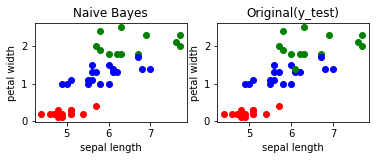

In [6]:
plt.subplot(221)
for i in range(len(X_test)):
    plt.plot(X_test[i][0], X_test[i][3], 'ro', color=colors[predict_NaiveB[i]])
plt.xlabel("sepal length");plt.ylabel("petal width");plt.title("Naive Bayes")

plt.subplot(222)
for i in range(len(X_test)):
    plt.plot(X_test[i][0], X_test[i][3], 'ro', color=colors[y_test[i]])
plt.xlabel("sepal length");plt.ylabel("petal width");plt.title("Original(y_test)")


plt.show()

- Analisando os gráficos abaixo, percebemos que o mesmo problema citado acima acontece aqui. Existe uma planta virginica que possui um 'petal width' mais proximo da versicolor. Com isso, mais uma vez obtivemos uma classificação incorreta, devido a anormalidades que não conseguiram ser previstas pelo algortimo.
- Outra observação a se fazer é o fato das setosas serem classificadas corretamente. Os valores tanto do 'petal width' quanto do 'sepal width' distoam bastante das demais plantas, por isso ela conseguiu ser classificada com perfeição. 

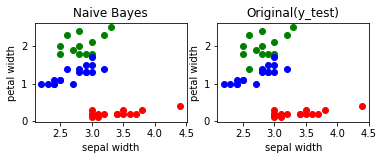

In [7]:
plt.subplot(221)
for i in range(len(X_test)):
    plt.plot(X_test[i][1], X_test[i][3], 'ro', color=colors[predict_NaiveB[i]])
plt.xlabel("sepal width");plt.ylabel("petal width");plt.title("Naive Bayes")


plt.subplot(222)
for i in range(len(X_test)):
    plt.plot(X_test[i][1], X_test[i][3], 'ro', color=colors[y_test[i]])
plt.xlabel("sepal width");plt.ylabel("petal width");plt.title("Original(y_test)")


plt.show()

### KNeighbors e sua análise gráfica:

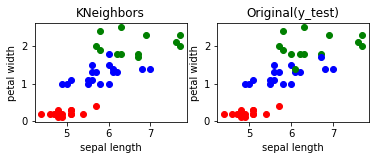

In [8]:
plt.subplot(221)
for i in range(len(X_test)):
    plt.plot(X_test[i][0], X_test[i][3], 'ro', color=colors[predict_KNN[i]])
plt.xlabel("sepal length");plt.ylabel("petal width");plt.title("KNeighbors")

plt.subplot(222)
for i in range(len(X_test)):
    plt.plot(X_test[i][0], X_test[i][3], 'ro', color=colors[y_test[i]])
plt.xlabel("sepal length");plt.ylabel("petal width");plt.title("Original(y_test)")


plt.show()

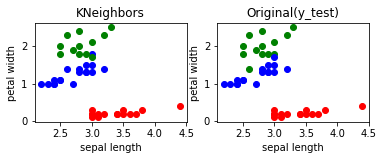

In [9]:
plt.subplot(221)
for i in range(len(X_test)):
    plt.plot(X_test[i][1], X_test[i][3], 'ro', color=colors[predict_KNN[i]])
plt.xlabel("sepal length");plt.ylabel("petal width");plt.title("KNeighbors")

plt.subplot(222)
for i in range(len(X_test)):
    plt.plot(X_test[i][1], X_test[i][3], 'ro', color=colors[y_test[i]])
plt.xlabel("sepal length");plt.ylabel("petal width");plt.title("Original(y_test)")


plt.show()

- Na análise do KNN, percebemos que os resultados não destoaram muito do Naive Bayes, até porque seus implementações e idéias são similares. Contudo, percebemos que, quando definimos um número 'k' de vizinhos, obtivemos mais erros que o Naive Bayes que utiliza a lógica de olhar todos em um range de uma determinada porcentagem a mais e a menos.

## Comparação de erro mais elaborada:

- Na comparação de erro simples, nós definimos apenas um random_state na hora de splitar os dados. Isso pode resultar em uma falsa análise de erros, já que com diferentes random_state, podemos ter diferentes performaces na análise.
- Para contornar esse problema, implementarei uma lógica simples. Farei com que a taxa de erro seja uma média aritmética simples de diferentes resultados, a partir de diferentes random_states, que nesse caso, escolhi que variem entre 0 e 10.

In [12]:
NB_media = []
KNN_media = []

for i in range(11):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=i)

    NaiveB = NaiveBayes()
    KNN = KNeighbors()

    NaiveB.learn(X_train, y_train)
    KNN.learn(X_train, y_train)

    predict_NaiveB = NaiveB.predict(X_test)
    predict_KNN = KNN.predict(X_test)
    
    NB_media.append(np.sum(y_test != predict_NaiveB)/len(y_test))
    KNN_media.append(np.sum(y_test != predict_KNN)/len(y_test))

print("Erro médio do Naive Bayes: %.2f\n"%(sum(NB_media)/len(NB_media)))
print("Erro médio do KNeighbors: %.2f"%(sum(KNN_media)/len(KNN_media)))

Erro médio do Naive Bayes: 0.04

Erro médio do KNeighbors: 0.05


# 04 - Conclusão:

- Após todo o processo de implementação e análise, chegamos a conclusão que o Naive Bayes se saiu melhor que o KNeighbors para esse dataset, apesar que por uma pequena margem. Contudo, também podemos perceber a limitação das duas classes que, devido a sua simplidade, não conseguiu prever anormalidades, ou seja, os algoritmos apenas previram o que era mais óbvio.
- Para o caso desse dataset, os algoritmos de predição tiveram um resultado satisfatório. Contudo, após entendermos e analisarmos suas limitações, vemos que o fato do classificador não assumir que as características interagem e exercem influências entre si, faz com que tanto o Naive Bayes quanto o KNeighbors não sejam os classificadores ideais para problemas mais complexos e reais.